## Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation of 5 using Python. Interpret the results.

In [1]:
import scipy.stats as stats
import math

sample_mean = 50
sample_std=5
ci=0.95
alpha = 1-ci
n=30 #Assumption made because sample size is not given
df = n-1 

#calculate standard error of the mean
std_mean_error = sample_std / math.sqrt(n)

#calaculate t value 
t_value = stats.t.ppf(1-alpha/2,df=df)

print(f"Critical t-statistic : {t_value}")

#margin of error
moe = t_value *std_mean_error
print(f"Margin of Error : {moe}")

#calcuate upper and lower bound of the sample interval
upper_bound= sample_mean + moe
lower_bound= sample_mean - moe

print(f"95% Confidence Interval : ( {lower_bound} , {upper_bound} ) ") 

Critical t-statistic : 2.0452296421327034
Margin of Error : 1.8670306837905
95% Confidence Interval : ( 48.1329693162095 , 51.8670306837905 ) 


## Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20% brown. Use Python to perform the test with a significance level of 0.05.

In [2]:
from scipy.stats import chisquare
import numpy as np

#significance level
alpha = 0.05

null_hypothesis = "The distribution of M&M colors does not match the expected distribution"
alternate_hypothesis = "The distribution of M&M colors matches the expected distribution"
#Observed frequencies Assumption made because values are not given
observed_frequencies = np.array([30, 25, 28, 14, 12, 21])  

#Expected frequencies
expected_frequencies = np.array([0.2,0.2,0.2,0.1,0.1,0.2]) * observed_frequencies.sum()

#perform chi square goodness of fit test
chi_square,pvalue = chisquare(observed_frequencies,expected_frequencies)

print("Chi-square statistic : ",chi_square)
print("p-value : ",pvalue)

#check if p value is less than significance level
if pvalue < alpha:
    print("Reject the null hypothesis")
    print("Final conclusion :",alternate_hypothesis)
else:
    print("Failed to Reject the null hypothesis")
    print("Final conclusion",null_hypothesis)

Chi-square statistic :  1.923076923076923
p-value :  0.8596831719899516
Failed to Reject the null hypothesis
Final conclusion The distribution of M&M colors does not match the expected distribution


## Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following data:

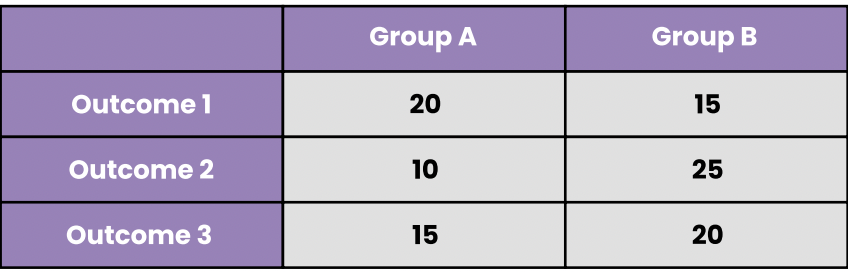

Interpret the results of the test.

In [3]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

contingency_table = np.array([[20,15],[10,25],[15,20]])

#chisquare test for independence
chi_square,p_value,degree,expected = chi2_contingency(contingency_table)

expected_df = pd.DataFrame(expected)
expected_df.columns = ['Group A','Group B']
expected_df.index = ['Outcome 1','Outcome 2','Outcome 3']


print("Chi square statistic : " , chi_square)
print("P-value statistic : " , p_value)
print("Degree of freedom : " , degree)
print(f"\nExpected Frequencies : \n\n{expected_df}")

Chi square statistic :  5.833333333333334
P-value statistic :  0.05411376622282158
Degree of freedom :  2

Expected Frequencies : 

           Group A  Group B
Outcome 1     15.0     20.0
Outcome 2     15.0     20.0
Outcome 3     15.0     20.0


## Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the population who smoke.

In [4]:
import scipy.stats as stats
import math 
#sample size
n=500
#no of people smoking from sample
x=60
#propotion of people who smoke from th sample 
p = x/n
#confidence interval
ci = 0.95
#significance level
alpha = 1-ci

#finding z statistic
z_statistic = stats.norm.ppf(1-alpha/2)

print("Z-Statistic : " , z_statistic)

#standard error
standard_error = math.sqrt((p*(1-p))/n)

#margin of error
moe = z_statistic*standard_error

#confidence intervals
ci_lower = p - moe
ci_upper = p + moe


print(f"95% Confidence Intervals : ( {ci_lower} , {ci_upper} )")
print(f"95% Confidence Intervals of the individuls who smoke in % : ( {ci_lower*100:.2f}% , {ci_upper*100:.2f}% )")

Z-Statistic :  1.959963984540054
95% Confidence Intervals : ( 0.09151638887130707 , 0.1484836111286929 )
95% Confidence Intervals of the individuls who smoke in % : ( 9.15% , 14.85% )


## Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python. Interpret the results.

In [5]:
import math
from scipy.stats import t

sample_mean = 75
sample_std = 12
ci=0.90
alpha = 1-ci
n = 40 #assumption because value is not given
df=n-1

#since population standard deviation is unkown we will use t test
t_statistic = t.ppf(1-alpha/2,df)

print(f"t-statistic : {t_statistic:.4f}")

#standard error 
standard_error = sample_std/math.sqrt(n)

#margin or error
moe = t_statistic*standard_error

#confidence interval
ci_upper = sample_mean + moe
ci_lower = sample_mean - moe

print(f"90% Confidence Interval : ( {ci_lower:.2f} , {ci_upper:.2f} ) ")

t-statistic : 1.6849
90% Confidence Interval : ( 71.80 , 78.20 ) 


## Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.

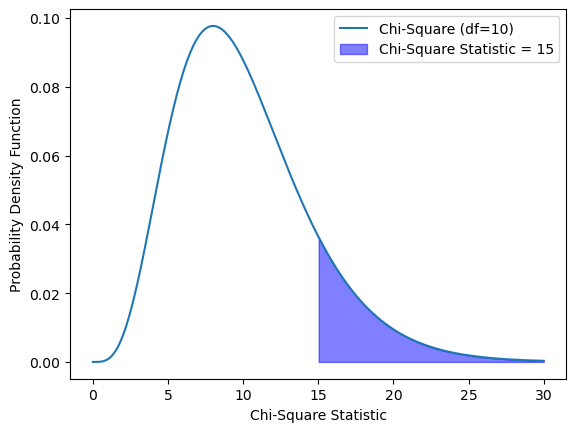

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Define the degrees of freedom
df = 10

# Create an array of values for the x-axis (chi-square statistic)
x = np.linspace(0, 30, 500)

# Calculate the chi-square distribution for the given degrees of freedom
chi_square_dist = chi2.pdf(x, df)

# Plot the chi-square distribution
plt.plot(x, chi_square_dist, label=f"Chi-Square (df={df})")

# Shade the area corresponding to a chi-square statistic of 15
plt.fill_between(x, chi_square_dist, where=(x >= 15), color='blue', alpha=0.5, label="Chi-Square Statistic = 15")

# Label the axes and add a legend
plt.xlabel("Chi-Square Statistic")
plt.ylabel("Probability Density Function")
plt.legend()

# Show the plot
plt.show()


## Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.

In [7]:
import scipy.stats as stats

n =1000
x=520
ci = 0.99
alpha = 1-ci
df = n-1

z_critical = stats.norm.ppf(1 - (1 - ci) / 2)

#calculate proption and standard
p = x/n
prop_error = math.sqrt((p*(1-p))/n)

#margin of error
moe = z_critical*prop_error

#confidence interval
ci_upper= p + moe
ci_lower= p - moe

print("Z-critical : " , z_critical)
print(f"99% Confidence Interval : ( {ci_lower} , {ci_upper} ) ")
print(f"99% Confidence Interval for the true propotion in % ( {ci_lower*100:.2f}% , {ci_upper*100:.2f}% ) ")


Z-critical :  2.5758293035489004
99% Confidence Interval : ( 0.4793051576779699 , 0.5606948423220302 ) 
99% Confidence Interval for the true propotion in % ( 47.93% , 56.07% ) 


## Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05.

In [8]:
import scipy.stats as stats

null_hypothesis = "coin is unbiased"
alternate_hypothesis = "coin is baised towards tails"
n=100
x = 45
alpha = 0.05

observed_frequency=[45,55]
expected_frequency = [50,50]

chisquare_test,pvalue = stats.chisquare(observed_frequency,expected_frequency)

print(f"t-value : {chisquare_test}")
print(f"p_value : {pvalue}")

#checking with significance level
if pvalue< alpha :
    print("Reject the null hypothesis")
    print(f"Final Conclusion : {alternate_hypothesis}")
else:
    print("Failed to Reject the null hypothesis")
    print(f"Final Conclusion : {null_hypothesis}")
    

t-value : 1.0
p_value : 0.31731050786291115
Failed to Reject the null hypothesis
Final Conclusion : coin is unbiased


## Q9. A study was conducted to determine if there is an association between smoking status (smoker or non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between smoking status and lung cancer diagnosis. Use a significance level of 0.05.


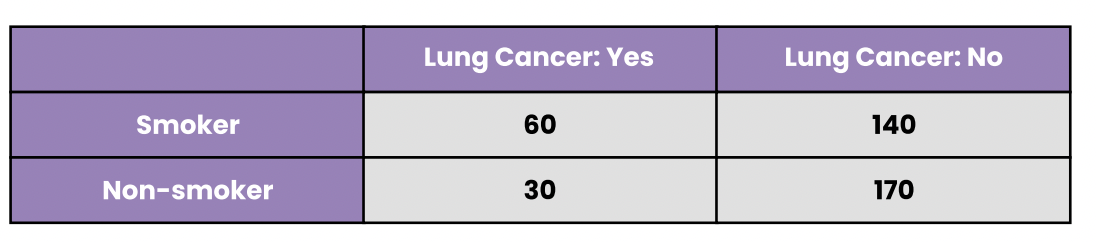

In [9]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

df = pd.DataFrame({"Lung Cancer:Yes" : [60,30] , "Lung Cancer:No" : [140,170]})
df.index = ["Smoker","Non-Smoker"]

alpha = 0.05

null_hypothothesis = "There is no significant association between smoking status and lung cancer diagnosis"
alternate_hypothesis = "There is a significant association between smoking status and lung cancer diagnosis"

#chisquare test statistic
chisquare_statistic ,p_value,dof,expected = chi2_contingency(df)

#expected data convert to data frame
expected_df = pd.DataFrame(expected)
expected_df.index = ["Smoker","Non-Smoker"]
expected_df.columns = ["Lung Cancer:Yes","Lung Cancer:No"]

print(f"Observed Data : \n\n {df}")
print(f"\n\nExpected Data : \n\n",expected_df)
print("\n\n\nChi-statistic : ",chisquare_statistic)
print(f"p-value : {p_value} ")
print(f"Degree of freedom : {dof} \n\n")

if p_value < alpha:
    print("Reject the null hypohesis")
    print(f"Final Conclusion : {alternate_hypothesis} ")
else:
    print("Failed to reject the null hypohesis")
    print(f"Final Conclusion : {null_hypothesis} ")

Observed Data : 

             Lung Cancer:Yes  Lung Cancer:No
Smoker                   60             140
Non-Smoker               30             170


Expected Data : 

             Lung Cancer:Yes  Lung Cancer:No
Smoker                 45.0           155.0
Non-Smoker             45.0           155.0



Chi-statistic :  12.057347670250895
p-value : 0.0005158863863703744 
Degree of freedom : 1 


Reject the null hypohesis
Final Conclusion : There is a significant association between smoking status and lung cancer diagnosis 


## Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin.Use a significance level of 0.01.

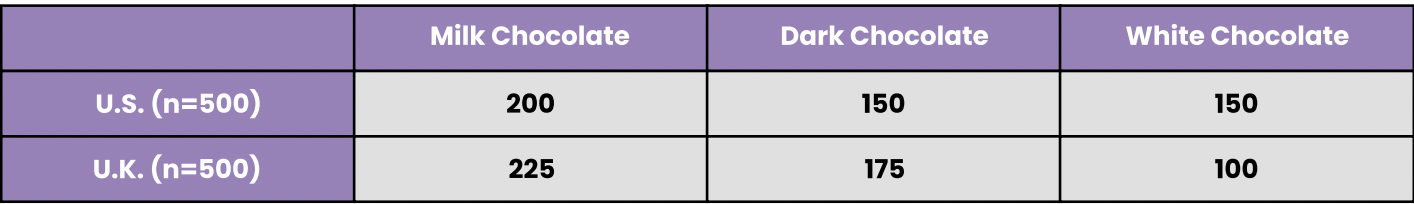

In [10]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

df = pd.DataFrame({"Milk Chocolate" : [200,225] , "Dark Chocolate" : [150,175],"White Chocolate" : [150,100]})
df.index = ["U.S.(n=500)","U.K.(n=500)"]

alpha = 0.01

null_hypothothesis = "There is no significant association between chocolate preference and country of origin"
alternate_hypothesis = "There is a significant association between chocolate preference and country of origin"

#chisquare test statistic
chisquare_statistic ,p_value,dof,expected = chi2_contingency(df)

#expected data convert to data frame
expected_df = pd.DataFrame(expected)
expected_df.index = ["U.S.(n=500)","U.K.(n=500)"]
expected_df.columns = ["Milk Chocolate","Dark Chocolate","White Chocolate"]

print(f"Observed Data : \n\n {df}")
print(f"\n\nExpected Data : \n\n",expected_df)
print("\n\n\nChi-statistic : ",chisquare_statistic)
print(f"p-value : {p_value} ")
print(f"Degree of freedom : {dof} \n\n")

if p_value < alpha:
    print("Reject the null hypohesis")
    print(f"Final Conclusion : {alternate_hypothesis} ")
else:
    print("Failed to reject the null hypohesis")
    print(f"Final Conclusion : {null_hypothesis} ")

Observed Data : 

              Milk Chocolate  Dark Chocolate  White Chocolate
U.S.(n=500)             200             150              150
U.K.(n=500)             225             175              100


Expected Data : 

              Milk Chocolate  Dark Chocolate  White Chocolate
U.S.(n=500)           212.5           162.5            125.0
U.K.(n=500)           212.5           162.5            125.0



Chi-statistic :  13.393665158371041
p-value : 0.0012348168997745918 
Degree of freedom : 2 


Reject the null hypohesis
Final Conclusion : There is a significant association between chocolate preference and country of origin 


## Q11. A random sample of 30 people was selected from a population with an unknown mean and standard deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10. Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a significance level of 0.05.

In [11]:
#solving using t test
from scipy.stats import t
import math

n=30
sample_mean =72
sample_std = 10
dof = n-1
alpha = 0.05

null_hypothesis = "Population mean is 70"
alternate_hypothesis = "Population mean is significantly different from 70"

# Calculate the t-statistic
t_stat = (sample_mean - 70) / (sample_std / math.sqrt(n))

# Calculate the p-value
p_value = 2 * (1 - t.cdf(t_stat, dof))

print("p-value : ",p_value)

if p_value < alpha:
    print("Reject the null hypohesis")
    print(f"Final Conclusion : {alternate_hypothesis} ")
else:
    print("Failed to reject the null hypohesis")
    print(f"Final Conclusion : {null_hypothesis} ")

p-value :  0.2823362372860698
Failed to reject the null hypohesis
Final Conclusion : Population mean is 70 


In [12]:
#solving using chisquare test
import scipy.stats as stats
import math

null_hypothesis = "Population mean is 70"
alternate_hypothesis = "Population mean is significantly different from 70"

n=30
sample_mean =72
sample_std = 10
dof = n-1
alpha = 0.05


observed_mean= 72
expected_mean = 70

#χ² = Σ [(Observed Frequency - Expected Frequency)² / Expected Frequency]
chi_square_test = (math.pow(observed_mean - expected_mean,2))/expected_mean

print(f"chisquare-value : {chi_square_test}")

# Calculate the p-value
p_value = 1 - stats.chi2.cdf(chi_square_test, dof)

print("p-value : ",p_value)

#checking with significance level
if pvalue< alpha :
    print("Reject the null hypothesis")
    print(f"Final Conclusion : {alternate_hypothesis}")
else:
    print("Failed to Reject the null hypothesis")
    print(f"Final Conclusion : {null_hypothesis}")
    

chisquare-value : 0.05714285714285714
p-value :  1.0
Failed to Reject the null hypothesis
Final Conclusion : Population mean is 70
